# Static ipython slider

In [1]:
# https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

In [2]:
from ipywidgets import StaticInteract, RangeWidget, RadioWidget

StaticInteract(plot,
               amplitude=RangeWidget(0.1, 1.0, 0.1),
               color=RadioWidget(['blue', 'green', 'red']))

ImportError: cannot import name 'StaticInteract'

# Widgets
https://github.com/ipython/ipywidgets/blob/477cb8046e3217b134762f53c66816c45d688a20/examples/Using%20Interact.ipynb

In [3]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [4]:
def f(x):
    return x

In [6]:
interact(f, x=10);

10

In [7]:
interact(f, x=True);

True

In [8]:
interact(f, x='Hi there!');

'Hi there!'

In [9]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

(True, 1.0)

In [10]:
def h(p, q):
    return (p, q)

In [11]:
interact(f, x=(0,8,2));

4

In [12]:
interact(f, x=(0.0,10.0,0.01));

4.99

In [13]:
# In addition to interact, IPython provides another function, 
# interactive, that is useful when you want to reuse the widgets that are 
# produced or access the data that is bound to the UI controls.
def f(a, b):
    return a+b

In [14]:
w = interactive(f, a=10, b=20)

In [15]:
type(w)

ipywidgets.widgets.widget_box.Box

In [16]:
from IPython.display import display
display(w)

30

In [17]:
w.kwargs

{'a': 10, 'b': 20}

In [18]:
w.result

30

In [19]:
#This function plot x, y and adds a title
# http://nbviewer.ipython.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/6%20-%20IPython%20Widgets.ipynb 
def plt_arrays(x, y, title="", color="red", linestyle="dashed", linewidth=2):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(x,y, color=color, linestyle=linestyle, linewidth=linewidth)
    axes.set_title(title)
    axes.grid()
    plt.show()

In [20]:
def f(a, b, **kwargs):
    x=np.linspace(-10, 10, 20)
    y = a*(x**3) + b*(x**2)
    
    title="$f(x) = (%s)x^{3} + (%s)x^{2}$" % (a,b)
    
    plt_arrays(x,y, title=title, **kwargs)

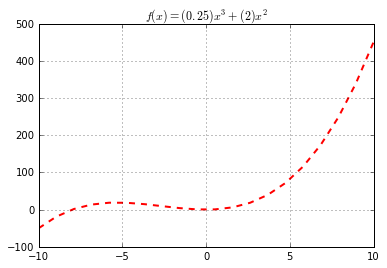

In [21]:
#Define Constants
a=0.25
b=2

f(a, b)

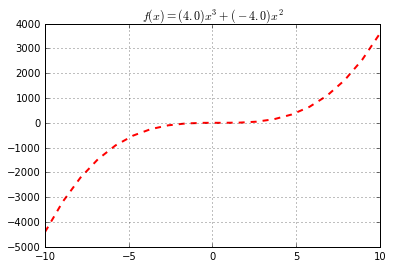

In [22]:
i = interact(f,
             a=(-10.,10),
             b=(-10.,10,1),
#              color = ["red", "blue", "green"],
#              linestyle=["solid", "dashed"],
#              linewidth=(1,5)
             )

# Create animation

In [26]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

In [27]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [29]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

/Users/Thomas/anaconda/lib/python3.5/site-packages/matplotlib/animation.py:782: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


BrokenPipeError: [Errno 32] Broken pipe

In [30]:
import matplotlib.animation as animation
import numpy as np
from pylab import *


dpi = 100

def ani_frame():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    im = ax.imshow(rand(300,300),cmap='gray',interpolation='nearest')
    im.set_clim([0,1])
    fig.set_size_inches([5,5])


    tight_layout()


    def update_img(n):
        tmp = rand(300,300)
        im.set_data(tmp)
        return im

    #legend(loc=0)
    ani = animation.FuncAnimation(fig,update_img,300,interval=30)
    writer = animation.writers['ffmpeg'](fps=30)

    ani.save('demo.mp4',writer=writer,dpi=dpi)
    return ani